In [1]:
# once i have wholegenome_offset.trees
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
from matplotlib import colors as mcolors
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
poly_str_order = ['1',    '2',    '5',   '10',   '20',   '50',  '100',  '500', '1000']
optima_order = ['optima0', 'optima1', 'optima2', 'optima3', 'optima4', 'optima5', 'optima6']

/tmp/ipykernel_434368/2697661513.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
heritability_data= {'1': 0.1,
'2': 0.3,
'3': 0.5,
'4': 0.7,
'5': 0.9}

optima_dict = {'optima7': 7,
               'optima6': 6,
               'optima5': 5,
               'optima4': 4,
               'optima3': 3,
               'optima2': 2,
               'optima1.5': 1.5,
               'optima1': 1,
               'optima0': 0}

def get_params(df):
    df = df.reset_index()
    df['index'] = df['index'].str.split('/subp').str[0]
    df['optima'] = df['index'].str.split('/').str[-1]
    df['sel'] = df['index'].str.split('/').str[-2]
    df['h2'] = df['index'].str.split('/').str[-3]
    df['poly'] = df['index'].str.split('_').str[-2]
    df['rep'] = df['index'].str.split('_').str[-1].str.split('/').str[0]
    df = df.drop('index',axis=1)
    return df

In [3]:
palette = sns.color_palette("viridis", 3)
#h1_levels = [0.1, 0.5, 0.9]

In [4]:
## for savio 
path = '/global/scratch/users/tbellg/slim_grenenet_results/final_results_cteg_talk/scrapping_results/es_dep_af/'

In [5]:
path = '/home/tbellagio/simulations/slim_grenenet_results/final_results_cteg_talk/scrapping_results/es_dep_af/'

In [6]:
#path = '/home/tbellagio/scratch/simulations/to_transfer/'

In [7]:
#scratch/simulations/to_transfer/_maxphenotype_stsc_before.csv

In [8]:
#os.listdir(path)

In [9]:
pop_size = pd.read_csv(path + 'pop_size_early.csv', index_col=[0])   #pop_size_early_stsc  pop_size_early
pop_size = get_params(pop_size)

In [10]:
pop_size['h2'].unique()

array(['5', '1', '4', '3'], dtype=object)

In [11]:
pop_size = pop_size[pop_size['optima'] != 'optima1.5']

In [12]:
pop_size['survival']=  pop_size['9'].notna().astype(int)

In [13]:
pop_size['pop_size']=  pop_size['9']

In [14]:
pop_size = pop_size[['optima', 'sel', 'h2', 'poly', 'rep', 'pop_size', 'survival']]

In [15]:
pop_size['pop_size'] = pop_size['pop_size'].fillna(0)

In [16]:
pop_size['poly'] = pop_size['poly'].str.replace('pi', '').astype(int)
pop_size['h2'] = pop_size['h2'].replace(heritability_data)
pop_size['optima'] = pop_size['optima'].replace(optima_dict)

/tmp/ipykernel_434368/2285043558.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pop_size['h2'] = pop_size['h2'].replace(heritability_data)
/tmp/ipykernel_434368/2285043558.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pop_size['optima'] = pop_size['optima'].replace(optima_dict)


In [17]:
pop_size

,optima,sel,h2,poly,rep,pop_size,survival
0,2,estrongsel,0.9,2,11,0.0,0
1,2,estrongsel,0.9,2,11,0.0,0
2,2,estrongsel,0.9,2,11,0.0,0
3,2,estrongsel,0.9,2,11,0.0,0
4,2,estrongsel,0.9,2,11,0.0,0
...,...,...,...,...,...,...,...
48595,0,estrongsel,0.5,500,23,65.0,1
48596,0,estrongsel,0.5,500,23,43.0,1
48597,0,estrongsel,0.5,500,23,16.0,1
48598,0,estrongsel,0.5,500,23,40.0,1


In [18]:
pop_size['h2'].unique()

array([0.9, 0.1, 0.7, 0.5])

In [23]:
pop_size['log_poly'] = np.log10(pop_size['poly'])

In [24]:
pop_size = pop_size[['optima', 'h2', 'poly', 'survival', 'pop_size']]

In [25]:
## eliminate optima 0 
pop_size = pop_size[pop_size['optima'] != 0 ]

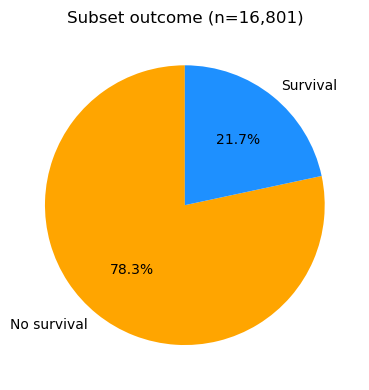

In [26]:
import matplotlib.pyplot as plt

# Data
labels = ['No survival', 'Survival']
values = [29619, 8185]
colors = ['orange', 'dodgerblue']

# Plot
# Plot
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 10}
)
ax.set_title('Subset outcome (n=16,801)', fontsize=12)
plt.tight_layout()

plt.savefig('c.pdf')
plt.show()

In [27]:
low_poly = pop_size[pop_size['poly'].isin([ 1,  2,    5,   10])]
high_poly = pop_size[pop_size['poly'].isin([ 50,  100,   500, 1000])]

In [28]:
low_poly['survival'].value_counts()

survival
0    14205
1     2596
Name: count, dtype: int64

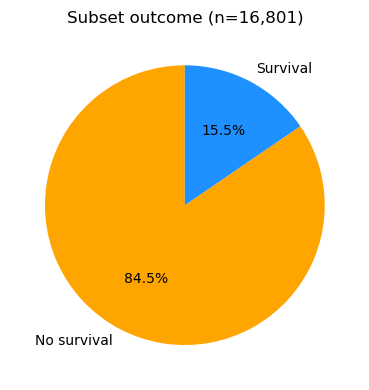

In [29]:
import matplotlib.pyplot as plt

# Data
labels = ['No survival', 'Survival']
values = [14205, 2596]
colors = ['orange', 'dodgerblue']

fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    colors=colors,
    startangle=90,
    autopct='%1.1f%%',
    textprops={'fontsize': 10}
)
ax.set_title('Subset outcome (n=16,801)', fontsize=12)
plt.tight_layout()

plt.savefig('survival_low_poly.pdf')
plt.show()


In [32]:
print('high poly')
high_poly.columns = ['SD to new optimum', 'h2', 'polygenicity', 'survival', 'pop_size']
# Split the data
X = high_poly[['SD to new optimum', 'h2', 'polygenicity']]
y = high_poly['survival']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Train a simple decision tree
tree_classifier = DecisionTreeClassifier(random_state=42, max_depth=2)  # Limit depth for simplicity
tree_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = tree_classifier.feature_importances_

# Print the importance of each variable
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

# Print feature importances
print("Feature importances:")
for feature, importance in zip(X.columns, tree_classifier.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Get information on tree structure
n_nodes = tree_classifier.tree_.node_count
children_left = tree_classifier.tree_.children_left
children_right = tree_classifier.tree_.children_right
feature = tree_classifier.tree_.feature
threshold = tree_classifier.tree_.threshold

print("\nTree structure:")
for i in range(n_nodes):
    if children_left[i] != children_right[i]:  # if it's not a leaf
        print(f"Node {i}: Split on feature '{X.columns[feature[i]]}', Threshold: {threshold[i]:.4f}")
    else:
        print(f"Node {i}: Leaf node")

high poly
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2495
           1       0.90      0.74      0.81       866

    accuracy                           0.91      3361
   macro avg       0.91      0.86      0.88      3361
weighted avg       0.91      0.91      0.91      3361

Feature: SD to new optimum, Importance: 0.5234
Feature: h2, Importance: 0.4766
Feature: polygenicity, Importance: 0.0000
Feature importances:
SD to new optimum: 0.5234
h2: 0.4766
polygenicity: 0.0000

Tree structure:
Node 0: Split on feature 'SD to new optimum', Threshold: 3.5000
Node 1: Split on feature 'h2', Threshold: 0.6000
Node 2: Leaf node
Node 3: Leaf node
Node 4: Split on feature 'SD to new optimum', Threshold: 4.5000
Node 5: Leaf node
Node 6: Leaf node


In [33]:
X_train['h2'].unique()

array([0.9, 0.5, 0.1, 0.7])

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [35]:
cm

array([[2427,   68],
       [ 227,  639]])

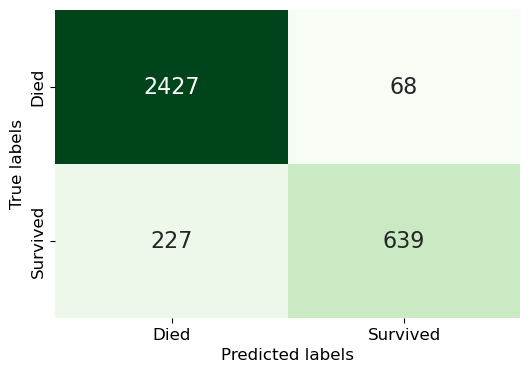

In [36]:
# Plotting
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, annot_kws={'size': 16})  # Larger annotations
plt.xlabel('Predicted labels', fontsize=12)  # Larger x-axis label
plt.ylabel('True labels', fontsize=12)  # Larger y-axis label
plt.xticks([0.5, 1.5], ['Died', 'Survived'], fontsize=12)  # Larger x-tick labels
plt.yticks([0.5, 1.5], ['Died', 'Survived'], va='center', fontsize=12)  # Larger y-tick labels
plt.savefig('prediction_high_poly.png',dpi=900)
plt.savefig('prediction_high_poly.svg')
plt.show()

In [98]:
tree_classifier

DecisionTreeClassifier(max_depth=2, random_state=42)

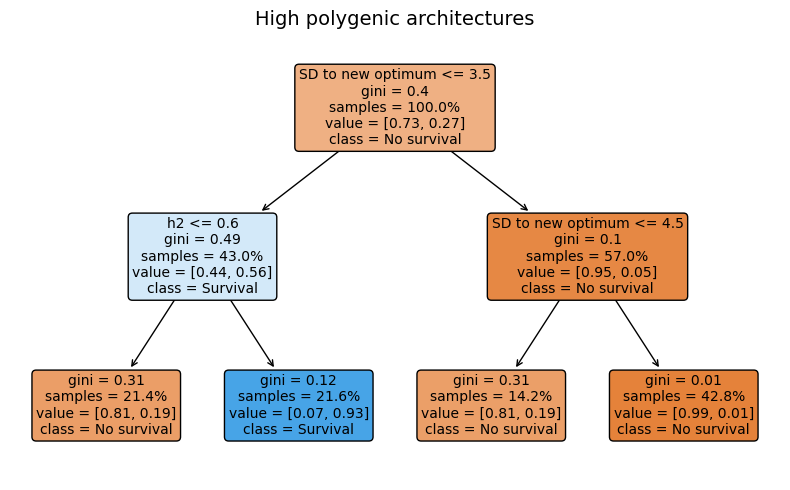

In [99]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'tree_classifier' is your trained Decision Tree model
# and 'X' is your features DataFrame

# Set up the plot with improved aesthetics
plt.figure(figsize=(8, 5))  # Increase the figure size for better readability
decision_tree = plot_tree(
    tree_classifier,
    feature_names=X.columns,
    class_names=['No survival', 'Survival'],
    filled=True,  # <- this line enables colored boxes
    fontsize=10,
    proportion=True,
    rounded=True,
    precision=2
)

# Add a title and potentially other aesthetic elements
plt.title('High polygenic architectures', fontsize=14)
plt.xlabel('Feature Variables', fontsize=14)
plt.ylabel('Tree Depth', fontsize=14)

# Optimize layout to make sure everything fits well within the plot area
plt.tight_layout()
#plt.savefig('decision_tree_high_poly.svg')
#plt.savefig('decision_tree_high_poly.png')
# Show the plot
plt.show()


In [100]:
X_train['h2'].unique()

array([0.9, 0.5, 0.7, 0.1, 0.3])

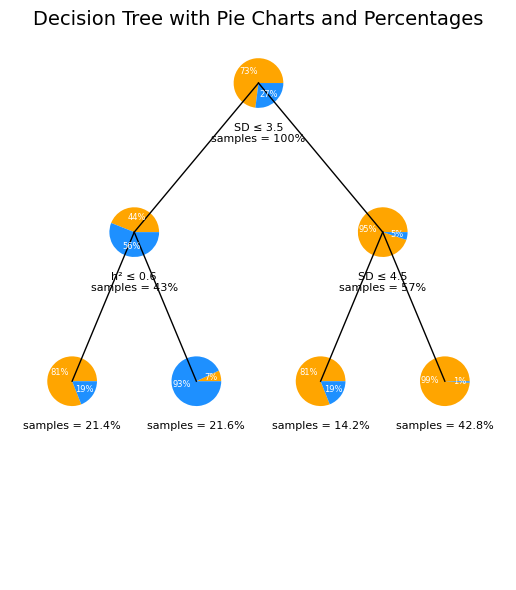

In [139]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

# Node definitions
nodes = [
    {"id": 0, "pos": (0.5, 1.0), "value": [0.73, 0.27], "label": "SD ≤ 3.5\nsamples = 100%", "class": "No survival"},
    {"id": 1, "pos": (0.25, 0.7), "value": [0.44, 0.56], "label": "h² ≤ 0.6\nsamples = 43%", "class": "Survival"},
    {"id": 2, "pos": (0.75, 0.7), "value": [0.95, 0.05], "label": "SD ≤ 4.5\nsamples = 57%", "class": "No survival"},
    {"id": 3, "pos": (0.125, 0.4), "value": [0.81, 0.19], "label": "samples = 21.4%", "class": "No survival"},
    {"id": 4, "pos": (0.375, 0.4), "value": [0.07, 0.93], "label": "samples = 21.6%", "class": "Survival"},
    {"id": 5, "pos": (0.625, 0.4), "value": [0.81, 0.19], "label": "samples = 14.2%", "class": "No survival"},
    {"id": 6, "pos": (0.875, 0.4), "value": [0.99, 0.01], "label": "samples = 42.8%", "class": "No survival"},
]

edges = [
    (0, 1), (0, 2),
    (1, 3), (1, 4),
    (2, 5), (2, 6)
]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot edges
for parent, child in edges:
    x0, y0 = nodes[parent]["pos"]
    x1, y1 = nodes[child]["pos"]
    ax.plot([x0, x1], [y0, y1], 'k-', lw=1)

# Draw pie charts and percentages at each node
for node in nodes:
    x, y = node["pos"]
    vals = node["value"]
    colors = ["orange", "dodgerblue"]
    
    # Draw pie chart
    wedges, texts = ax.pie(vals, center=(x, y), radius=0.05, colors=colors)
    
    # Add percentage labels inside the pie slices
    total = sum(vals)
    start_angle = 0
    for i, val in enumerate(vals):
        angle = 360 * val / total / 2 + start_angle
        radians = np.deg2rad(angle)
        x_text = x + 0.03 * np.cos(radians)
        y_text = y + 0.03 * np.sin(radians)
        ax.text(x_text, y_text, f"{val/total:.0%}", ha='center', va='center', fontsize=6, color='white')
        start_angle += 360 * val / total

    # Add node label under the pie
    ax.text(x, y - 0.08, node["label"], ha="center", va="top", fontsize=8)

ax.set_title("Decision Tree with Pie Charts and Percentages", fontsize=14)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1.1)
ax.axis("off")
plt.tight_layout()
plt.savefig('pie_charts_tree_with_percentages.pdf')
plt.show()


In [101]:
import dtreeviz


In [102]:
X_train['h2'].unique()

array([0.9, 0.5, 0.7, 0.1, 0.3])

In [117]:
LIGHTORANGE = 'orange'
BLUE = 'blue'
DARKBLUE = 'blue'
color_blind_friendly_colors = [
    None,  # 0 classes
    None,  # 1 class
    ['#e41a1c', '#4daf4a'],  # 2 classes
    ['#FEFEBB', '#D9E6F5', '#a1dab4'],  # 3 classes
    ['#FEFEBB', '#D9E6F5', '#a1dab4', LIGHTORANGE],  # 4
    ['#FEFEBB', '#D9E6F5', '#a1dab4', '#41b6c4', LIGHTORANGE],  # 5
    ['#FEFEBB', '#c7e9b4', '#41b6c4', '#2c7fb8', LIGHTORANGE, '#f46d43'],  # 6
    ['#FEFEBB', '#c7e9b4', '#7fcdbb', '#41b6c4', '#225ea8', '#fdae61', '#f46d43'],  # 7
    ['#FEFEBB', '#edf8b1', '#c7e9b4', '#7fcdbb', '#1d91c0', '#225ea8', '#fdae61', '#f46d43'],  # 8
    ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', BLUE, DARKBLUE, LIGHTORANGE, '#fdae61', '#f46d43'],  # 9
    ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', BLUE, DARKBLUE, LIGHTORANGE, '#fdae61', '#f46d43', '#d73027']  # 10
]

In [118]:
viz_model.view(
    precision: int = 2,
    orientation: ('TD', 'LR') = 'TD',
    instance_orientation: ('TD', 'LR') = 'LR',
    show_root_edge_labels: bool = True,
    show_node_labels: bool = False,
    show_just_path: bool = False,
    fancy: bool = True,
    histtype: ('bar', 'barstacked', 'strip') = 'barstacked',
    leaftype: ('pie', 'barh') = 'pie',
    highlight_path: List[int] = [],
    x: numpy.ndarray = None,
    max_X_features_LR: int = 10,
    max_X_features_TD: int = 20,
    depth_range_to_display: tuple = None,
    label_fontsize: int = 12,
    ticks_fontsize: int = 8,
    fontname: str = 'Arial',
    title: str = None,
    title_fontsize: int = 10,
    colors: dict = None,
    scale=1.0,
) -> dtreeviz.utils.DTreeVizRender

SyntaxError: invalid syntax (3134717968.py, line 2)

In [119]:
from dtreeviz import model  # make sure dtreeviz >= 2.2
import pandas as pd

# Example: If your class labels are 0 and 1 for 'No survival' and 'Survival'
class_names_dict = {
    0: "No survival",
    1: "Survival"
}

colors = {
    'classes': color_blind_friendly_colors  # red for class 0, green for class 1
}
# Create the visualizer model
viz_model = model(
    tree_classifier,
    X_train=X_train,
    y_train=y_train,
    feature_names=X_train.columns.tolist(),
    target_name='Survival outcome',
    class_names=class_names_dict,
)


# View and save
v = viz_model.view(orientation = 'LR', instance_orientation = 'TD', histtype = 'barstacked', colors=colors)     # render as SVG into internal object 

#v.show()  # Opens in browser
v.save("survival_tree.svg")  # Save to file (SVG, PNG also works)


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

In [32]:

viz = dtreeviz(
    model,
    X, y,
    target_name="Survival",
    feature_names=X.columns.tolist(),
    class_names={0: "No survival", 1: "Survival"},
    fancy=True,  # activates pictogram mode
    scale=1.0
)

#viz.save("tree_pictogram.svg")  # Save to file
viz.view()  # Open in browser


ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (/home/tbellagio/.local/lib/python3.11/site-packages/dtreeviz/trees.py)

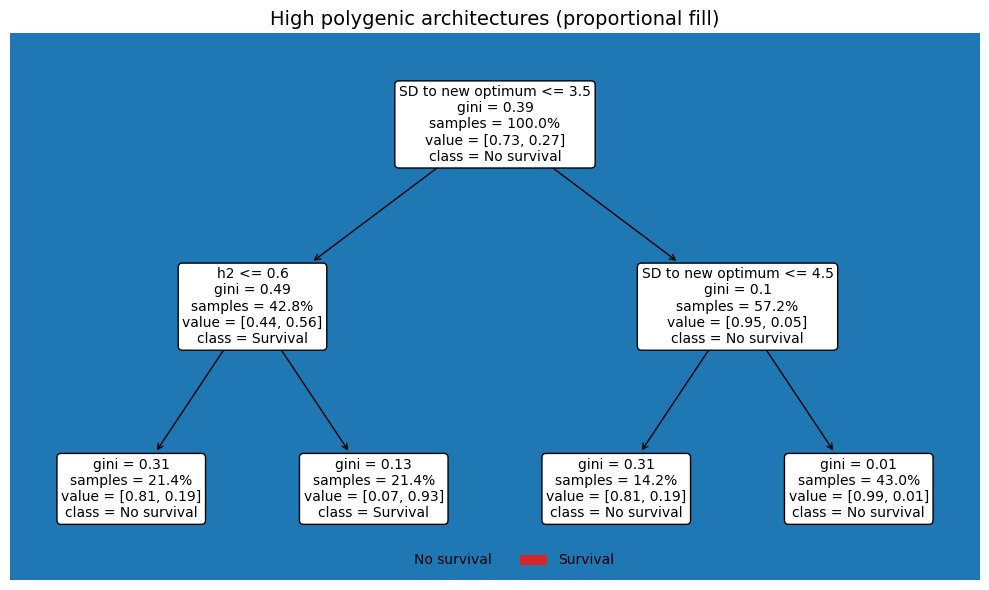

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.patches import Rectangle, Patch
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

# Plot without color fill
plot_tree(
    tree_classifier,
    feature_names=X.columns,
    class_names=['No survival', 'Survival'],
    filled=False,
    proportion=True,
    rounded=True,
    ax=ax,
    fontsize=10,
    precision=2
)

# Define your class colors (No survival = blue, Survival = red)
colors = ['#1f77b4', '#d62728']  # blue and red

# Map from text to associated box
for ann in ax.texts:
    if 'value = [' in ann.get_text():
        bbox = ann.get_bbox_patch()
        if bbox is None:
            continue

        # Extract proportions from the text
        lines = ann.get_text().split('\n')
        val_line = [line for line in lines if 'value =' in line][0]
        raw_vals = val_line.split('=')[1].strip().strip('[]')
        proportions = [float(v) for v in raw_vals.split(',')]

        # Get bounding box of the node box
        x0 = bbox.get_x()
        y0 = bbox.get_y()
        width = bbox.get_width()
        height = bbox.get_height()

        # Draw proportional bars *inside* each box
        left = x0
        for prop, color in zip(proportions, colors):
            ax.add_patch(Rectangle((left, y0), width * prop, height,
                                   facecolor=color, edgecolor=None, alpha=0.5, zorder=5))
            left += width * prop

# Optional: white background and legend
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

legend_elements = [
    Patch(facecolor=colors[0], label='No survival'),
    Patch(facecolor=colors[1], label='Survival')
]
ax.legend(handles=legend_elements, loc='lower center', ncol=2, frameon=False)

plt.title("High polygenic architectures (proportional fill)", fontsize=14)
plt.tight_layout()
plt.show()


In [37]:
print('low poly')
low_poly.columns = ['SD to new optimum', 'h2', 'polygenicity', 'survival', 'pop_size']
# Split the data
X = low_poly[['SD to new optimum', 'h2', 'polygenicity']]
y = low_poly['survival']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Train a simple decision tree
tree_classifier = DecisionTreeClassifier(random_state=42, max_depth=2)  # Limit depth for simplicity
tree_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = tree_classifier.feature_importances_

# Print the importance of each variable
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")
# Print feature importances
print("Feature importances:")
for feature, importance in zip(X.columns, tree_classifier.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Get information on tree structure
n_nodes = tree_classifier.tree_.node_count
children_left = tree_classifier.tree_.children_left
children_right = tree_classifier.tree_.children_right
feature = tree_classifier.tree_.feature
threshold = tree_classifier.tree_.threshold

print("\nTree structure:")
for i in range(n_nodes):
    if children_left[i] != children_right[i]:  # if it's not a leaf
        print(f"Node {i}: Split on feature '{X.columns[feature[i]]}', Threshold: {threshold[i]:.4f}")
    else:
        print(f"Node {i}: Leaf node")

low poly
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2821
           1       0.00      0.00      0.00       540

    accuracy                           0.84      3361
   macro avg       0.42      0.50      0.46      3361
weighted avg       0.70      0.84      0.77      3361

Feature: SD to new optimum, Importance: 0.4938
Feature: h2, Importance: 0.5062
Feature: polygenicity, Importance: 0.0000
Feature importances:
SD to new optimum: 0.4938
h2: 0.5062
polygenicity: 0.0000

Tree structure:
Node 0: Split on feature 'SD to new optimum', Threshold: 3.5000
Node 1: Split on feature 'h2', Threshold: 0.6000
Node 2: Leaf node
Node 3: Leaf node
Node 4: Split on feature 'h2', Threshold: 0.6000
Node 5: Leaf node
Node 6: Leaf node


/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [39]:
cm

array([[2821,    0],
       [ 540,    0]])

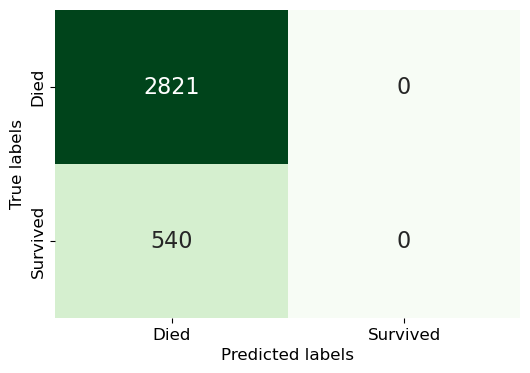

In [40]:
# Plotting
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, annot_kws={'size': 16})  # Larger annotations
plt.xlabel('Predicted labels', fontsize=12)  # Larger x-axis label
plt.ylabel('True labels', fontsize=12)  # Larger y-axis label
plt.xticks([0.5, 1.5], ['Died', 'Survived'], fontsize=12)  # Larger x-tick labels
plt.yticks([0.5, 1.5], ['Died', 'Survived'], va='center', fontsize=12)  # Larger y-tick labels
plt.savefig('prediction_low_poly.png', dpi=900)
plt.savefig('prediction_low_poly.svg')
plt.show()

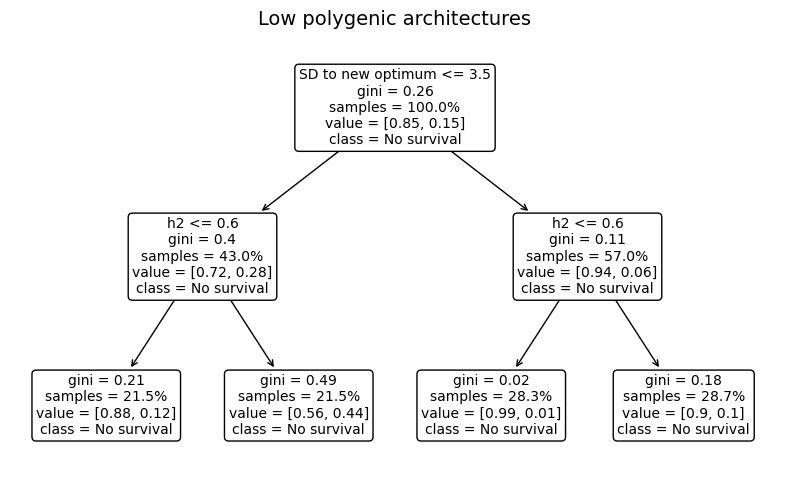

In [126]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'tree_classifier' is your trained Decision Tree model
# and 'X' is your features DataFrame

# Set up the plot with improved aesthetics
plt.figure(figsize=(8, 5))  # Increase the figure size for better readability
decision_tree = plot_tree(
    tree_classifier,
    feature_names=X.columns,
    class_names=['No survival', 'Survival'],  # Optionally more descriptive class names
    filled=False,
    fontsize=10,  # Adjust font size to fit your preference
    proportion=True,  # Display the proportion of each class in the leaves
    rounded=True,  # Round the corners of the boxes
    precision=2  # Limit the number of decimal places on probabilities
)

# Add a title and potentially other aesthetic elements
plt.title('Low polygenic architectures', fontsize=14)

plt.xlabel('Feature Variables', fontsize=14)
plt.ylabel('Tree Depth', fontsize=14)

# Optimize layout to make sure everything fits well within the plot area
plt.tight_layout()
plt.savefig('decision_tree_low_poly.svg')
plt.savefig('decision_tree_low_poly.png')
# Show the plot
plt.show()
